Размер обучающей выборки: (76, 5)
Размер тестовой выборки: (19, 5)

Последние 5 чисел: [0.4937956  0.52273283 0.42754102 0.02541913 0.10789143]
Предсказанное следующее число: 0.4569

Feature Importance:
Y(t-1): 0.0974
Y(t-2): 0.1558
Y(t-3): 0.1641
Y(t-4): 0.0441
Y(t-5): 0.0285
Следующее спрогнозированное число: 0.45693390784324617


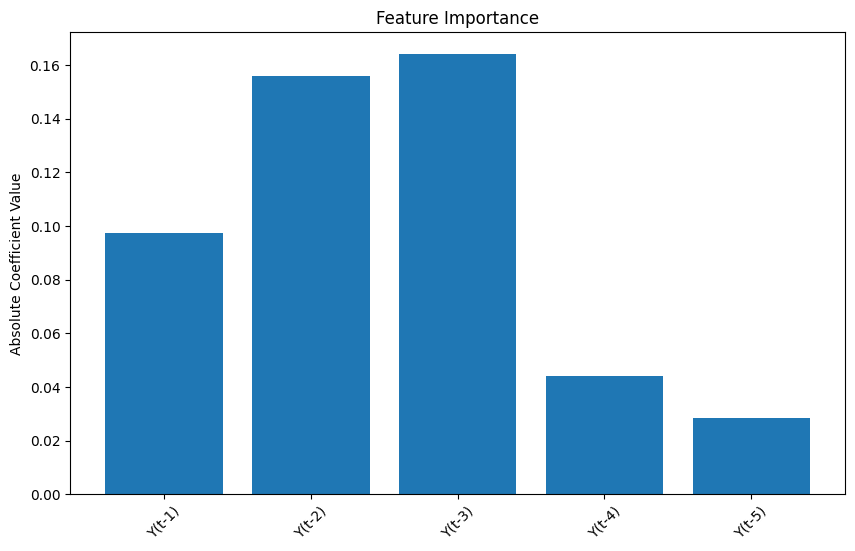

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.arange(100)
Y = np.random.rand(100)

window_size = 5
X_features = []
y_target = []

for i in range(window_size, len(Y)):
    X_features.append(Y[i-window_size:i])
    y_target.append(Y[i])

X_features = np.array(X_features)
y_target = np.array(y_target)

split_idx = int(0.8 * len(X_features))
train_X = X_features[:split_idx]
train_Y = y_target[:split_idx]
test_X = X_features[split_idx:]
test_Y = y_target[split_idx:]

print(f"Размер обучающей выборки: {train_X.shape}")
print(f"Размер тестовой выборки: {test_X.shape}")

clf = LinearRegression()
clf.fit(train_X, train_Y)

predictions = clf.predict(test_X)

last_sequence = Y[-window_size:]
next_prediction = clf.predict(last_sequence.reshape(1, -1))

print(f"\nПоследние 5 чисел: {last_sequence}")
print(f"Предсказанное следующее число: {next_prediction[0]:.4f}")

feature_importance = np.abs(clf.coef_)
feature_names = [f'Y(t-{i+1})' for i in range(window_size)]

print(f"\nFeature Importance:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.ylabel('Absolute Coefficient Value')

current_sequence = last_sequence.copy()

next_val = clf.predict(current_sequence.reshape(1, -1))[0]

print(f"Следующее спрогнозированное число: {next_val}")
